# Chapter 1

## The NBA Draft

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading data

Let's read in the draft round picks from between 2000 and 2009

In [97]:
draft = pd.read_csv('../data/draft.csv', encoding='latin-1')
draft

,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1,2009,NBA,1,1,LAC,Blake Griffin,20.106,F,us,...,8.8,4.4,0.9,0.5,0.498,0.521,0.333,0.694,75.2,0.167
1,2,2009,NBA,1,2,MEM,Hasheem Thabeet,22.135,C,tz,...,2.7,0.1,0.3,0.8,0.567,0.567,NaN,0.578,4.8,0.099
2,3,2009,NBA,1,3,OKC,James Harden,19.308,G,us,...,5.3,6.3,1.6,0.5,0.442,0.509,0.363,0.858,133.3,0.226
3,4,2009,NBA,1,4,SAC,Tyreke Evans,19.284,G-F,us,...,4.6,4.8,1.2,0.4,0.440,0.468,0.323,0.757,28.4,0.075
4,5,2009,NBA,1,5,MIN,Ricky Rubio,18.252,G,es,...,4.2,7.8,1.9,0.1,0.391,0.416,0.326,0.840,36.4,0.102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,289,2000,NBA,1,25,PHO,Jake Tsakalidis,21.024,C,ge,...,3.9,0.3,0.2,0.7,0.490,0.490,0.000,0.657,9.9,0.095
289,290,2000,NBA,1,26,DEN,Mamadou N'Diaye,25.019,C,sn,...,3.3,0.1,0.2,0.9,0.427,0.429,0.000,0.736,1.8,0.101
290,291,2000,NBA,1,27,IND,Primo_ Brezec,20.275,C,si,...,3.9,0.5,0.2,0.4,0.498,0.499,0.167,0.701,10.8,0.084
291,292,2000,NBA,1,28,POR,Erick Barkley,22.133,G,us,...,0.8,1.5,0.7,0.0,0.356,0.373,0.267,0.900,0.2,0.027


## Wrangling data

Firstly let's remove superfluous columns from the data

In [98]:
draft = draft.drop(draft.columns[[2, 3]], axis=1)
# note, we've reduced the values by 2 when compared with the book because we've done this in two stages.
draft = draft.drop(draft.columns[13:22], axis=1) 

Now let's remove unwanted rows - these are mostly blank

In [99]:
draft = draft.drop([90, 131])

### Viewing data

Let's get an impression of the data, first and last three rows:

In [100]:
draft[1:4]

,Rk,Year,Pk,Tm,Player,Age,Pos,Born,College,From,To,G,MP,WS,WS/48
1,2,2009,2,MEM,Hasheem Thabeet,22.135,C,tz,UConn,2010.0,2014.0,224.0,10.5,4.8,0.099
2,3,2009,3,OKC,James Harden,19.308,G,us,Arizona State,2010.0,2020.0,826.0,34.3,133.3,0.226
3,4,2009,4,SAC,Tyreke Evans,19.284,G-F,us,Memphis,2010.0,2019.0,594.0,30.7,28.4,0.075


In [101]:
draft[-3:]

,Rk,Year,Pk,Tm,Player,Age,Pos,Born,College,From,To,G,MP,WS,WS/48
290,291,2000,27,IND,Primo_ Brezec,20.275,C,si,NaN,2002.0,2010.0,342.0,18.1,10.8,0.084
291,292,2000,28,POR,Erick Barkley,22.133,G,us,St. John's,2001.0,2002.0,27.0,9.9,0.2,0.027
292,293,2000,29,LAL,Mark Madsen,24.158,F,us,Stanford,2001.0,2009.0,453.0,11.8,8.2,0.074


### Converting data to categories

If you plan to model or visualize data, converting variables to factors that are truely categorical is almost mandatory.

pandas has a datatype called "categorical", which is the equivalent of R's factor type.

In [102]:
draft['Year'] = draft['Year'].astype('category')
draft['Tm'] = draft['Tm'].astype('category')
draft['Born'] = draft['Born'].astype('category')
draft['From'] = draft['From'].astype('category')
draft['To'] = draft['To'].astype('category')

### Creating dervied variables

A field named Born2 should show whether a player was born in or outside the US.

In [103]:
draft['Born2'] = draft['Born'].apply(lambda place: 'USA' if place == 'us' else 'World').astype('category')

We want a second field to determine whether the player can from college or not.

In [104]:
draft['College2'] = draft['College'].isna().map({True: 0, False: 1}).astype('category')

Finally we want to clean up the player's position, replacing

* C by Center
* C-F and F-C by Big
* F by Forward
* G by Guard
* F-G and G-F by Swingman

In [105]:
draft['Pos2'] = draft['Pos'].map({
    'C': 'Center',
    'C-F': 'Big',
    'F': 'Forward',
    'F-C': 'Big',
    'F-G': 'Swingman',
    'G': 'Guard',
    'G-F': 'Swingman'
}).astype('category')

## Exploratory data analysis

EDA is most often a mix of computing basic statistics and creating visual content. We will concentrate here on a single variable *win shares*.

Let's start with the describe function. The describe() method in pandas provides a summary of statistical information about a DataFrame or Series. When applied to a DataFrame, it gives you a quick overview of the central tendency, dispersion, and shape of the distribution of your data.

In [106]:
draft.describe()

,Rk,Pk,Age,G,MP,WS,WS/48
count,291.000000,291.000000,291.000000,289.000000,289.000000,289.000000,289.000000
mean,147.243986,15.219931,20.718677,528.048443,21.559170,29.486159,0.076332
std,84.949147,8.471845,1.408725,319.388779,7.780285,33.709831,0.061509
min,1.000000,1.000000,17.249000,6.000000,4.300000,-1.600000,-0.326000
25%,73.500000,8.000000,19.327000,249.000000,15.700000,4.100000,0.051000
50%,148.000000,15.000000,21.016000,549.000000,21.600000,19.700000,0.079000
75%,220.500000,22.500000,22.052500,790.000000,27.700000,43.900000,0.106000
max,293.000000,30.000000,25.019000,1326.000000,38.400000,236.100000,0.244000


Note, in this case, the median is named (correctly) as the 50th percentile.

If we want to find the players matching the min or max of specific properties we can select them as follows,

Minimum win share:

In [107]:
row = draft[draft['WS'] == draft['WS'].min()][:1]
row[['Player', 'Tm', 'Pk', 'Year']]

,Player,Tm,Pk,Year
118,Mardy Collins,NYK,29,2006


Maximum win share:

In [108]:
row = draft[draft['WS'] == draft['WS'].max()][:1]
row[['Player', 'Tm', 'Pk', 'Year']]

,Player,Tm,Pk,Year
179,LeBron James,CLE,1,2003


Minimum goals:

In [109]:
row = draft[draft['G'] == draft['G'].min()][:1]
row[['Player', 'Tm', 'Pk', 'Year']]

,Player,Tm,Pk,Year
170,Pavel Podkolzin,UTA,21,2004


Maximum goals:

In [110]:
row = draft[draft['G'] == draft['G'].max()][:1]
row[['Player', 'Tm', 'Pk', 'Year']]

,Player,Tm,Pk,Year
271,Jamal Crawford,CLE,8,2000


## Computing and visualizing frequency distributions

### Histograms

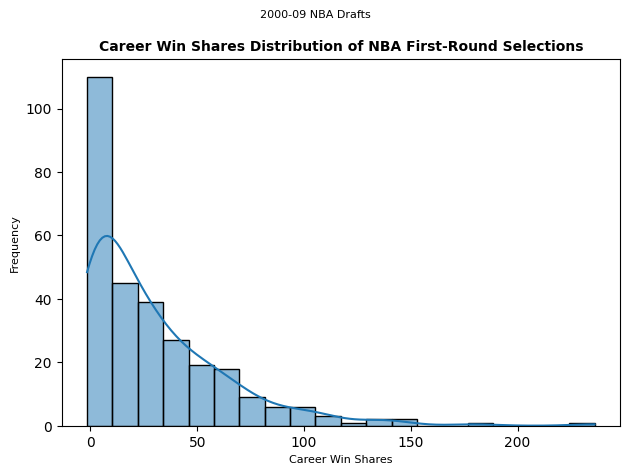

In [111]:
sns.histplot(draft['WS'], kde=True)
plt.title('Career Win Shares Distribution of NBA First-Round Selections', fontsize=10, fontweight='bold')
plt.suptitle('2000-09 NBA Drafts', fontsize=8)
plt.xlabel('Career Win Shares', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.tight_layout()

In [112]:
print(len(draft[draft['WS'] >= 75]), "win shares greater then 75")
print(len(draft[draft['WS'] < 75]), "win shares less then 75")
print(len(draft[draft['WS'] <= 25]), "win shares less then 25")

27 win shares greater then 75
262 win shares less then 75
167 win shares less then 25


### Boxplots

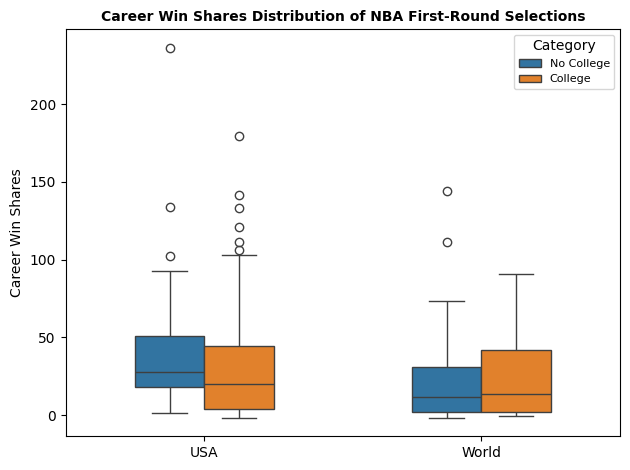

In [116]:
box_draft = draft.copy()
box_draft['College2'] = box_draft['College2'].map({0: 'No College', 1: 'College'})
ax = sns.boxplot(x='Born2', y='WS', hue='College2', data=box_draft, width=0.5, dodge=True)
plt.title('Career Win Shares Distribution of NBA First-Round Selections', fontsize=10, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('Career Win Shares', fontsize=10)
plt.legend(title='Category', title_fontsize=10, fontsize=8)
plt.tight_layout()